# L1 (Lasso) Regression

Lasso Regression, which stands for `Least Absolute Shrinkage and Selection Operator`, is a type of linear regression that uses shrinkage. Shrinkage here means that the data values are shrunk towards a central point, like the mean. The lasso technique encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

## Key Features of Lasso Regression:

1. Regularization Term: The key characteristic of Lasso Regression is that it adds an L1 penalty to the regression model, which is the absolute value of the magnitude of the coefficients. 

2. Feature Selection: One of the advantages of lasso regression over ridge regression is that it can result in sparse models with few coefficients; some coefficients can become exactly zero and be eliminated from the model. This property is called automatic feature selection and is a form of embedded method.

3. Parameter Tuning: The strength of the L1 penalty is determined by a parameter, typically denoted as alpha or lambda. Selecting a good value for this parameter is crucial and is typically done using cross-validation.

4. Bias-Variance Tradeoff: Similar to ridge regression, lasso also manages the bias-variance tradeoff in model training. Increasing the regularization strength increases bias but decreases variance, potentially leading to better generalization on unseen data.

5. Scaling: Before applying lasso, it is recommended to scale/normalize the data as lasso is sensitive to the scale of input features.

## Implementation in Scikit-Learn:

Lasso regression can be implemented using the Lasso class from Scikit-Learn's linear_model module. Here's a basic example:

In [2]:
# import necessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load the dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

In [8]:
# Select features and target
X = california_df.drop('MedHouseVal', axis=1)
y = california_df['MedHouseVal']


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Initialize Lasso regression model
lasso_model = Lasso(alpha=0.1, max_iter=10000)

In [13]:
# Train the model
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [14]:
# Predict using the Lasso model
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

# Print the results
print(f"Lasso Regression (L1) - Mean Squared Error: {mse:.2f}")
print(f"Lasso Regression (L1) - R^2 Score: {r2:.2f}")

Lasso Regression (L1) - Mean Squared Error: 0.68
Lasso Regression (L1) - R^2 Score: 0.48


In [17]:
# Coefficients of Lasso
lasso_coefs = lasso_model.coef_

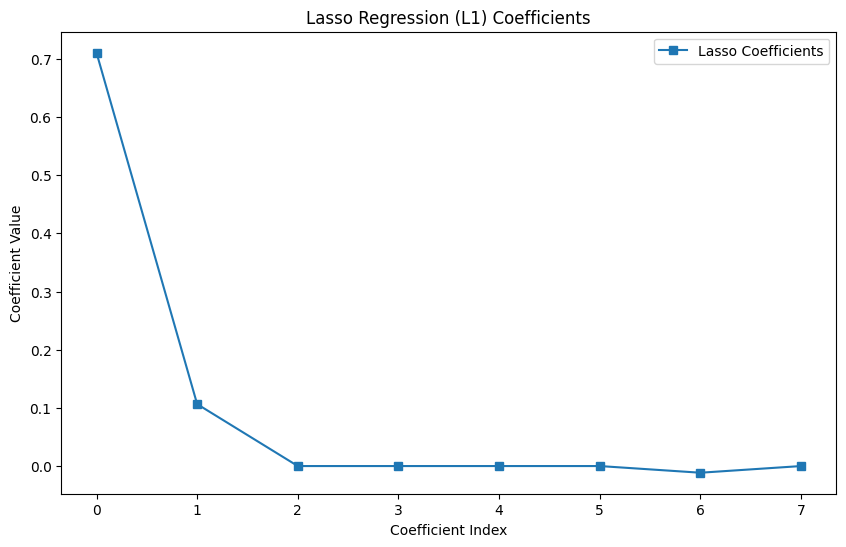

In [18]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_coefs)), lasso_coefs, 's-', label='Lasso Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression (L1) Coefficients')
plt.legend()
plt.show()
